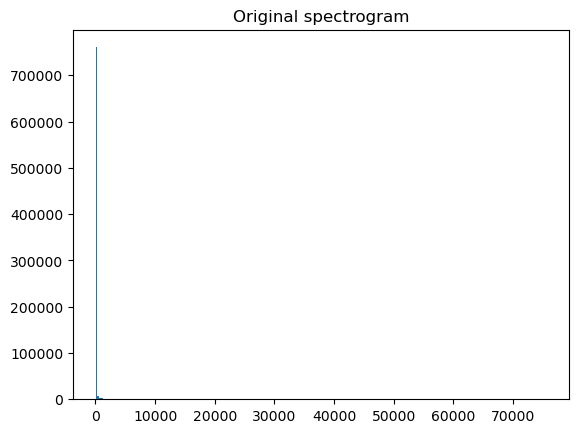

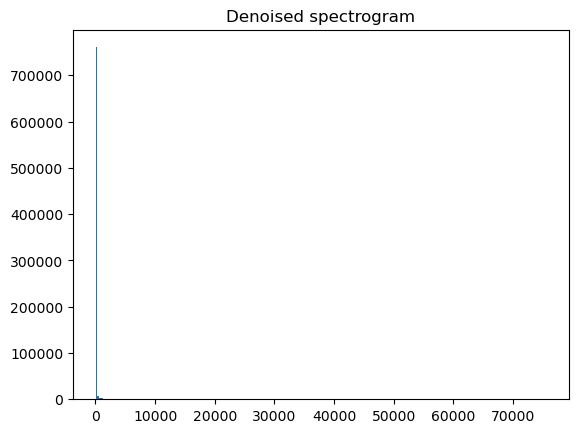

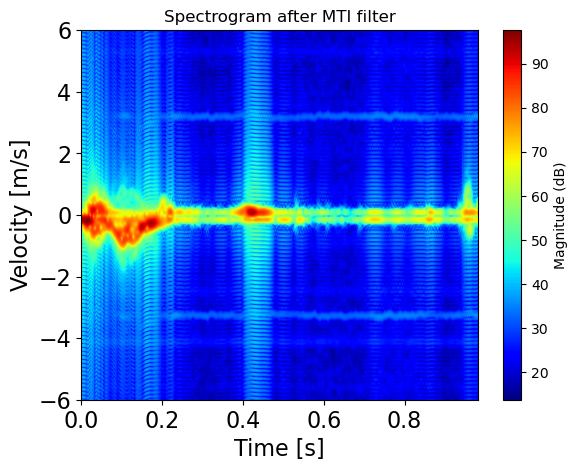

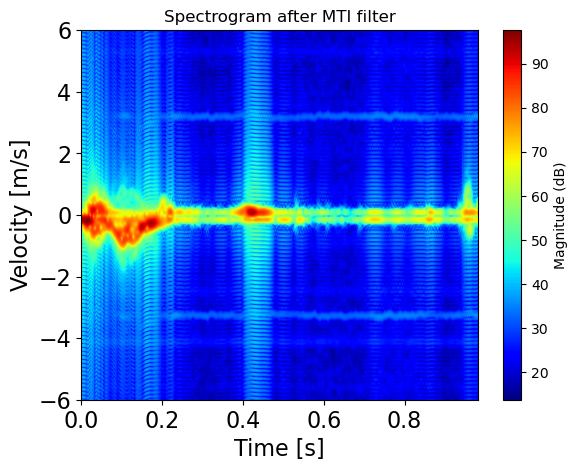

In [17]:
from preprocessing import *

spec, v, t = preprocess_file('datasets/1 December 2017 Dataset/2P36A02R01.dat', th_type='try_all', plot_spec_mti=True, plot_hist=True)


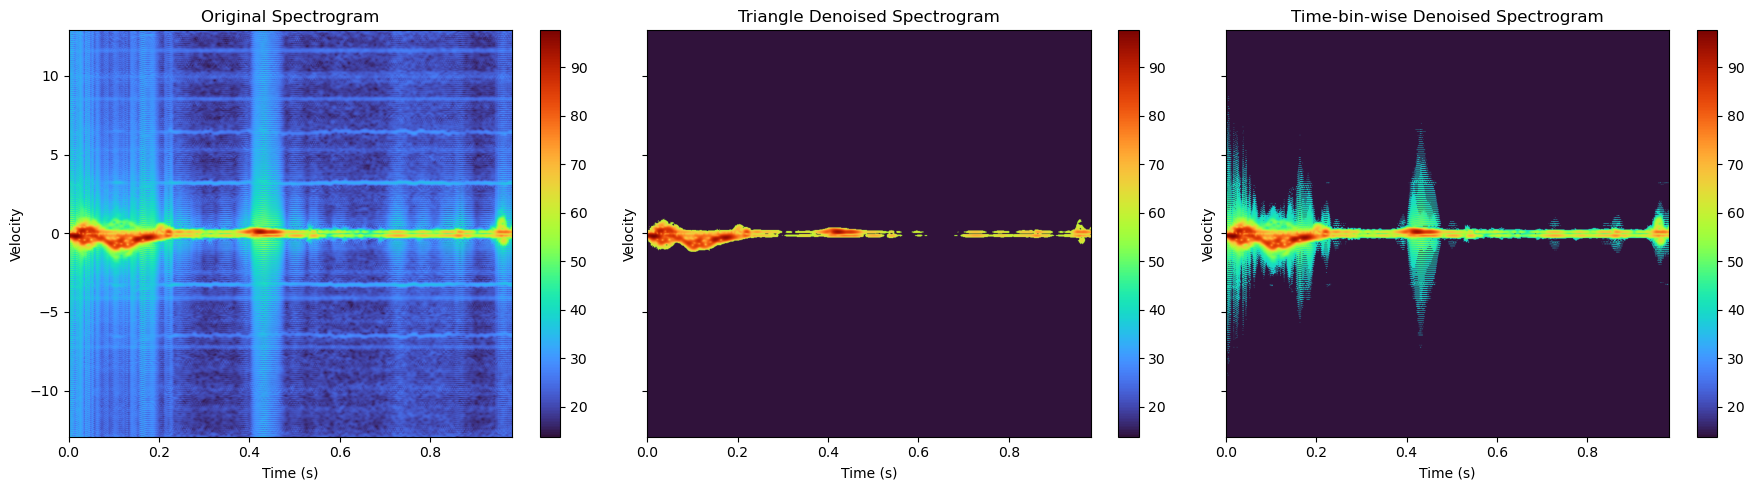

In [ ]:
import matplotlib.pyplot as plt

triangle_spec = denoise_spectrogram(spec, th_type="triangle")
triangle_spec_time_bin_wise = denoise_spectrogram_per_timebin_basis(spec)

# Convert all spectrograms to dB scale for consistent visualization
spec_scaled = 20 * np.log10(spec + 1e-12)
triangle_spec_scaled = 20 * np.log10(triangle_spec + 1e-12)
triangle_spec_time_bin_wise_scaled = 20 * np.log10(triangle_spec_time_bin_wise + 1e-12)
# Set color limits based on the original spectrogram
vmin = spec_scaled.min()
vmax = spec_scaled.max()

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

im0 = axs[0].imshow(spec_scaled, aspect='auto', origin='lower', extent=[t[0], t[-1], v[0], v[-1]], vmin=vmin, vmax=vmax, cmap='turbo')
axs[0].set_title('Original Spectrogram')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(triangle_spec_scaled, aspect='auto', origin='lower', extent=[t[0], t[-1], v[0], v[-1]], vmin=vmin, vmax=vmax, cmap='turbo')
axs[1].set_title('Triangle Denoised Spectrogram')
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(triangle_spec_time_bin_wise_scaled, aspect='auto', origin='lower', extent=[t[0], t[-1], v[0], v[-1]], vmin=vmin, vmax=vmax, cmap='turbo')
axs[2].set_title('Time-bin-wise Denoised Spectrogram')
fig.colorbar(im2, ax=axs[2])

for ax in axs:
    ax.set_ylabel('Velocity')
    ax.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

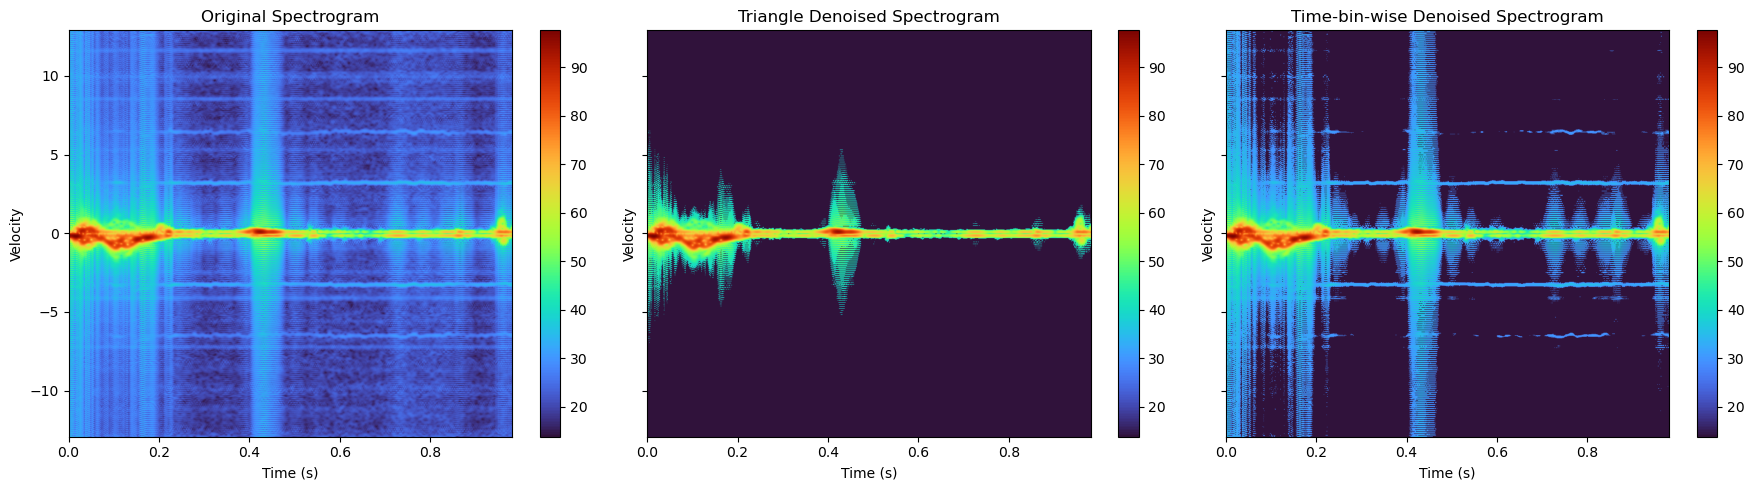

In [ ]:
# Denoise on log-scaled spectrogram
triangle_spec_pre_scaled = denoise_spectrogram(spec_scaled, th_type="triangle")
triangle_spec_time_bin_wise_pre_scaled = denoise_spectrogram_per_timebin_basis(spec_scaled)

# Set color limits based on the original spectrogram
vmin = spec_scaled.min()
vmax = spec_scaled.max()

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

im0 = axs[0].imshow(spec_scaled, aspect='auto', origin='lower', extent=[t[0], t[-1], v[0], v[-1]], vmin=vmin, vmax=vmax, cmap='turbo')
axs[0].set_title('Original Spectrogram')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(triangle_spec_pre_scaled, aspect='auto', origin='lower', extent=[t[0], t[-1], v[0], v[-1]], vmin=vmin, vmax=vmax, cmap='turbo')
axs[1].set_title('Triangle Denoised Spectrogram')
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(triangle_spec_time_bin_wise_pre_scaled, aspect='auto', origin='lower', extent=[t[0], t[-1], v[0], v[-1]], vmin=vmin, vmax=vmax, cmap='turbo')
axs[2].set_title('Time-bin-wise Denoised Spectrogram')
fig.colorbar(im2, ax=axs[2])

for ax in axs:
    ax.set_ylabel('Velocity')
    ax.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

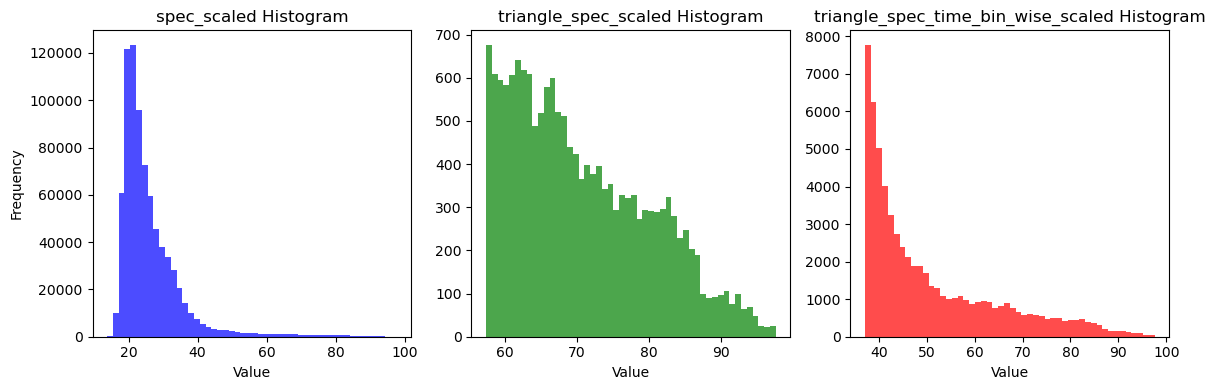

In [ ]:
# Histograms of log scale spectrograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(spec_scaled.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('spec_scaled Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(triangle_spec_scaled.ravel()[triangle_spec_scaled.ravel() != -240], bins=50, color='green', alpha=0.7)
plt.title('triangle_spec_scaled Histogram')
plt.xlabel('Value')

plt.subplot(1, 3, 3)
plt.hist(triangle_spec_time_bin_wise_scaled.ravel()[triangle_spec_time_bin_wise_scaled.ravel() != -240], bins=50, color='red', alpha=0.7)
plt.title('triangle_spec_time_bin_wise_scaled Histogram')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

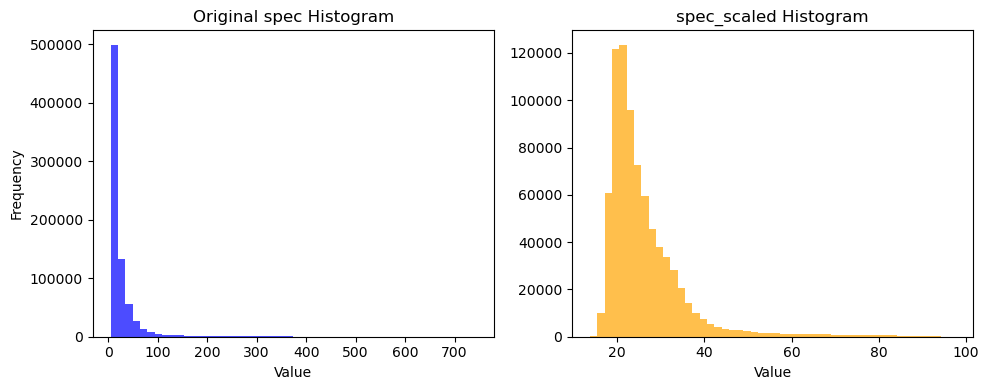

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
# plt.hist(spec.ravel(), bins=50, color='blue', alpha=0.7)
plt.hist(spec.ravel()[triangle_spec_scaled.ravel() < 1], bins=50, color='blue', alpha=0.7) # If you want to exclude 0 Malina
plt.title('Original spec Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(spec_scaled.ravel(), bins=50, color='orange', alpha=0.7)
plt.title('spec_scaled Histogram')
plt.xlabel('Value')

plt.tight_layout()
plt.show()